# Chapter-2: End-to-End Machine Learning Project

## Download the Data

In [2]:
import os
import tarfile
import urllib

DOWNOALD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNOALD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
dataframe = load_housing_data()

## Looking into the Data

In [10]:
dataframe.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
dataframe["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
dataframe.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

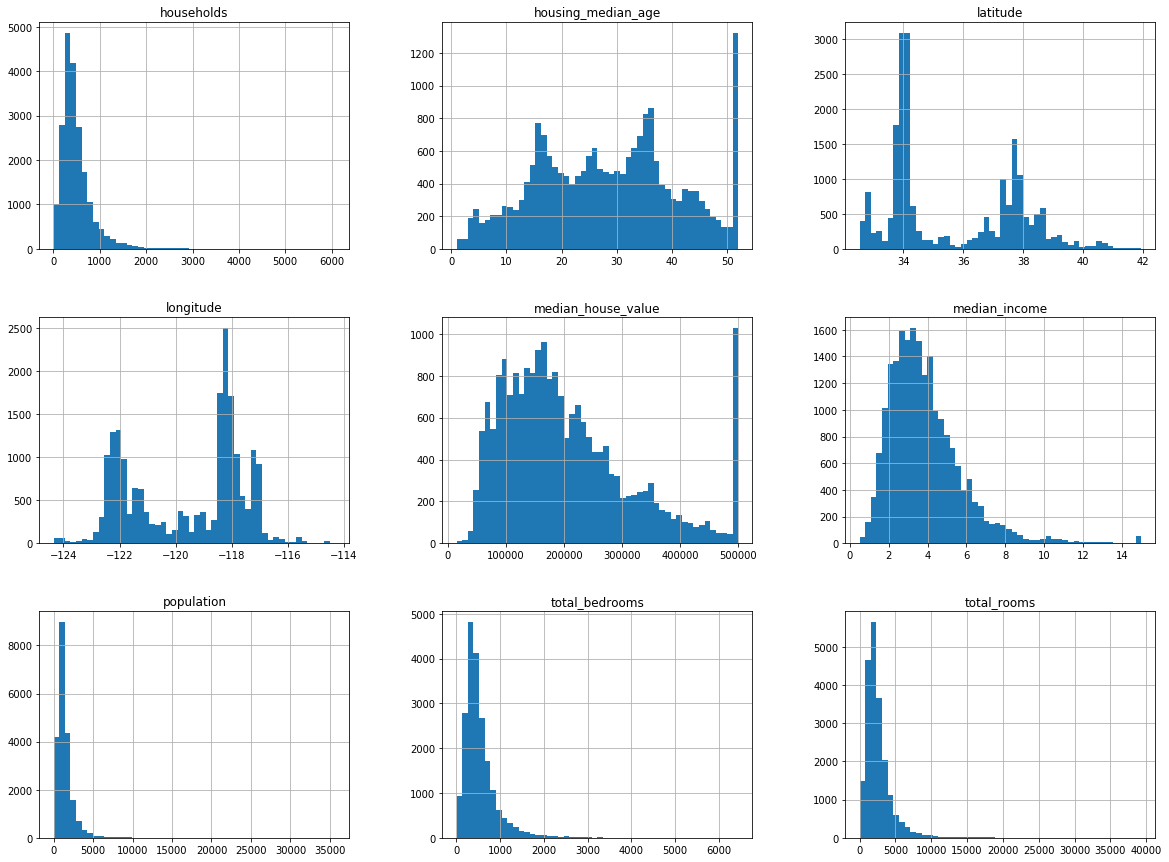

In [18]:
import matplotlib.pyplot as plt
dataframe.hist(bins=50, figsize=(20, 15))
plt.show()

## Creating Train and  Test Set

In [19]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(dataframe, 0.2)

In [22]:
print(f"training set length: {len(train_set)}")
print(f"test set length: {len(test_set)}")

training set length: 16512
test set length: 4128


In [29]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [30]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [31]:
dataframe_with_id = dataframe.reset_index()
dataframe_with_id["id"] = dataframe["longitude"] * 1000 + dataframe["latitude"]
train_set, test_set = split_train_test_by_id(dataframe_with_id, 0.2, "id")

In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)

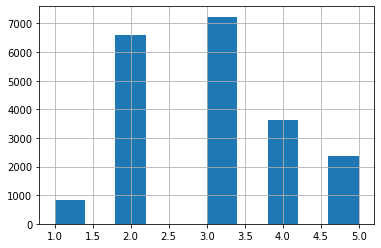

In [33]:
dataframe["income_cat"] = pd.cut(dataframe["median_income"],
                                 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1, 2, 3, 4, 5])
dataframe["income_cat"].hist()

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataframe, dataframe["income_cat"]):
    strat_train_set = dataframe.loc[train_index]
    strat_test_set = dataframe.loc[test_index]

In [41]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [42]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

Text(0.5, 1.0, 'A geographical scatterplot of the dat')

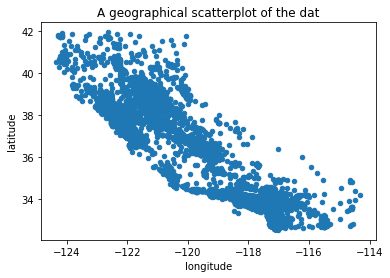

In [47]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.title("A geographical scatterplot of the dat")

Text(0.5, 1.0, 'A better visualization that highlights high-density area')

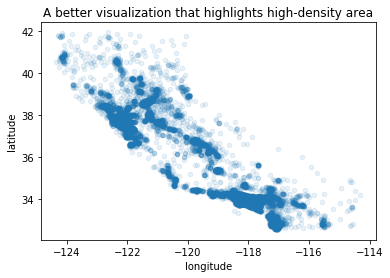

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("A better visualization that highlights high-density area")

Text(0.5, 1.0, 'California housing prices: red is expensive, blue is cheap, larger circles indi‐cate areas with a larger population')

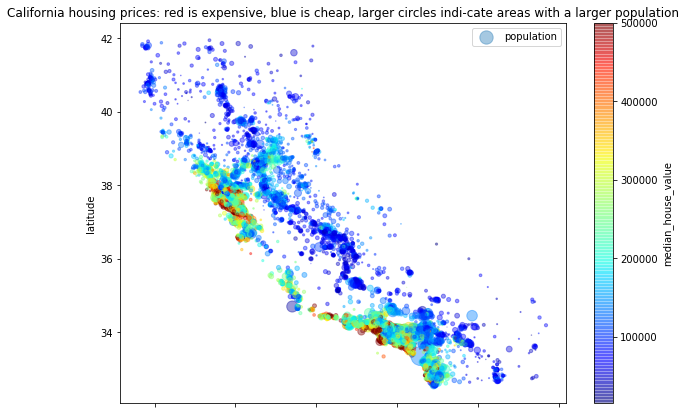

In [53]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()
plt.title("California housing prices: red is expensive, blue is cheap, larger circles indi‐cate areas with a larger population")

In [57]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025007DE4548>,
      dtype=object)

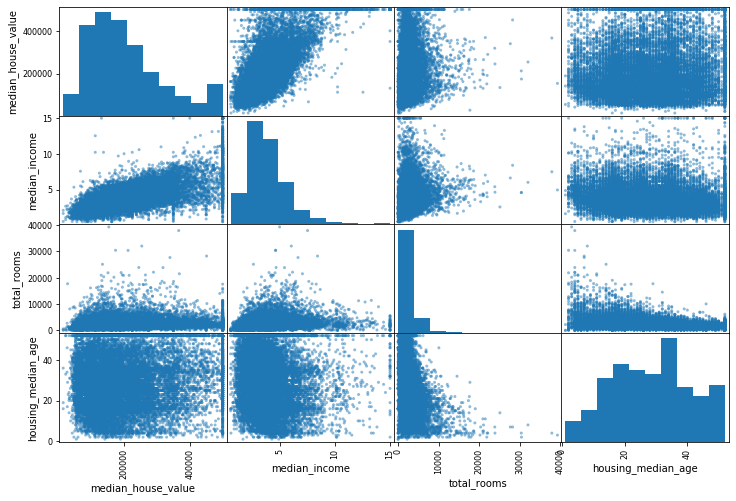

In [60]:
from pandas.plotting import scatter_matrix

attributes  = ["median_house_value", "median_income", "total_rooms",
               "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))


Text(0.5, 1.0, 'Scatter Plot between median_income and median_house_value')

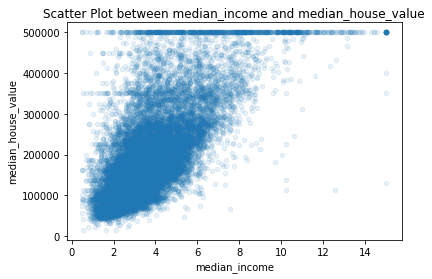

In [61]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1)
plt.title("Scatter Plot between median_income and median_house_value")

## Experimenting With Attribute Combinations

In [64]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [65]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [66]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [68]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [69]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [74]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index=housing_num.index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [82]:
housing_cat = housing[["ocean_proximity"]]

In [84]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
housing_cat_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [86]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Creating a Custom Transformer for doing the transformations above

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, berooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to dorooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, population_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [97]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [101]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [102]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [103]:
housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

### Trying out Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68898.54780411992

### Trying out Decision Tree Regression

In [113]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [115]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_rmse

0.0

Overfittinnnnggggg!!!!!

#### Better evaluation using cross-validation

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [124]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [125]:
display_scores(tree_rmse_scores)

Scores:  [68045.60932185 65865.25235727 69879.30683229 69893.60519419
 69559.74800924 72657.0899556  67543.8649632  66115.96011179
 74464.80697657 71570.06520944]
Mean:  69559.53089314379
Standard deviation:  2641.4665900984423


In [126]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [67500.31361237 68404.48325957 68239.95757613 74813.56736728
 68419.88576794 71632.92651865 65216.31837467 68702.06708289
 71793.11060978 68131.30099374]
Mean:  69285.39311630058
Standard deviation:  2576.7108344336134


### Trying out Random Forest Regressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse =  np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_rmse

18527.64936989001

In [134]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [48661.5075542  46854.57670224 48861.53393644 51691.9950769
 48222.00521744 52862.68530648 48260.37519729 47683.10109009
 52464.27808505 49538.6570529 ]
Mean:  49510.071521902384
Standard deviation:  1986.9563243866235


In [135]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111596.40267590198

## Fine-Tuning Model

### Grid Search

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [137]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [138]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63305.65934391652 {'max_features': 2, 'n_estimators': 3}
55266.27212405339 {'max_features': 2, 'n_estimators': 10}
52874.762812802546 {'max_features': 2, 'n_estimators': 30}
59704.322461651085 {'max_features': 4, 'n_estimators': 3}
52615.79937545136 {'max_features': 4, 'n_estimators': 10}
50564.62725780524 {'max_features': 4, 'n_estimators': 30}
59307.714807241064 {'max_features': 6, 'n_estimators': 3}
51870.75885667417 {'max_features': 6, 'n_estimators': 10}
50040.334295399705 {'max_features': 6, 'n_estimators': 30}
57074.78220644235 {'max_features': 8, 'n_estimators': 3}
51999.112787696955 {'max_features': 8, 'n_estimators': 10}
49584.699588123796 {'max_features': 8, 'n_estimators': 30}
62669.44039923691 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54097.76180211492 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59699.031721954234 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52437.10655184606 {'bootstrap': False, 'max_features': 3, 'n_estimato

### Randomized Search

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [140]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48939.30108678404 {'max_features': 7, 'n_estimators': 180}
51176.40723188606 {'max_features': 5, 'n_estimators': 15}
50521.711660776724 {'max_features': 3, 'n_estimators': 72}
50412.6563362184 {'max_features': 5, 'n_estimators': 21}
49033.01849133767 {'max_features': 7, 'n_estimators': 122}
50516.45064823802 {'max_features': 3, 'n_estimators': 75}
50362.207959311854 {'max_features': 3, 'n_estimators': 88}
49356.28897404136 {'max_features': 5, 'n_estimators': 100}
50190.48284309722 {'max_features': 3, 'n_estimators': 150}
63948.09890545012 {'max_features': 5, 'n_estimators': 2}


In [141]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.25034879e-02, 6.59736919e-02, 4.16616309e-02, 1.48226858e-02,
       1.54157204e-02, 1.56295840e-02, 1.42658989e-02, 3.64312753e-01,
       5.09279851e-02, 7.54950910e-02, 9.86855794e-02, 1.19304840e-02,
       1.50565549e-01, 1.01262250e-04, 3.25113994e-03, 4.45745652e-03])

In [143]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3643127525148289, 'median_income'),
 (0.15056554939678665, 'INLAND'),
 (0.0986855793919525, 'bedrooms_per_room'),
 (0.07549509103448646, 'pop_per_hhold'),
 (0.07250348794176865, 'longitude'),
 (0.06597369188711832, 'latitude'),
 (0.05092798510690534, 'rooms_per_hhold'),
 (0.041661630904212335, 'housing_median_age'),
 (0.015629583993823394, 'population'),
 (0.015415720410151148, 'total_bedrooms'),
 (0.01482268583363207, 'total_rooms'),
 (0.01426589887088409, 'households'),
 (0.011930484011595917, '<1H OCEAN'),
 (0.00445745651609475, 'NEAR OCEAN'),
 (0.003251139935571539, 'NEAR BAY'),
 (0.00010126225018799773, 'ISLAND')]

### Evaluate Your System on the Test Set

In [144]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [145]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [146]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45888.39248456, 49725.37660302])

## Full piple with predictor

In [148]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(X_test)

array([418611.83965981, 266359.48801849, 231330.68443985, ...,
       289838.28263913, 190255.49508036, 146820.44442777])

## Model saving

In [150]:
my_model = full_pipeline_with_predictor

In [169]:

import joblib
joblib.dump(my_model, "my_model_ch2.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model_ch2.pkl") # DIFF

## A transformer in the preparation pipeline to select only the most important attributes.

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [154]:
top_k_feature_indices = indices_of_top_k(feature_importances, 5)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [155]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [157]:
sorted(zip(feature_importances, attributes), reverse=True)[:5]

[(0.3643127525148289, 'median_income'),
 (0.15056554939678665, 'INLAND'),
 (0.0986855793919525, 'bedrooms_per_room'),
 (0.07549509103448646, 'pop_per_hhold'),
 (0.07250348794176865, 'longitude')]

In [159]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5))
])

In [160]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [161]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871, -0.05357521,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.05423838,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499, -0.04531347,  0.        ]])

In [162]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871, -0.05357521,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.05423838,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499, -0.04531347,  0.        ]])